## Model - 1 : Linear Regressino Model for Beta estimation in context to Capital Asset Pricing Model (CAPM)
---

In [1]:
#importing all required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
# Plotly.express module can plot interactive plots easily and effectively.

In [3]:

# Load CSV file and parse the 'Date' column as dates
transformed_df = pd.read_csv("transformed_returns_(2015-2019).csv", parse_dates=['Date'], index_col='Date')

# Display the first few rows to check if the file was loaded correctly
print(transformed_df.head())

# data split into train and test
linear_train_df, linear_test_df = train_test_split(transformed_df, test_size=0.2, shuffle=False) #shuffle would be false as we are dealing with time series data


            Market_Returns  Asset_Returns
Date                                     
2015-01-02        0.000000       0.000000
2015-01-05       -0.018278      -0.016890
2015-01-06       -0.008894      -0.030320
2015-01-07        0.011629      -0.002606
2015-01-08        0.017888       0.037617


In [4]:
linear_train_df.tail(10)

,Market_Returns,Asset_Returns
Date,,
2018-12-14,-0.019181,-0.016482
2018-12-17,-0.020866,-0.019690
2018-12-18,-0.000006,0.023309
2018-12-19,-0.015488,-0.057463
2018-12-20,-0.015865,-0.024712
2018-12-21,-0.020681,-0.041025
2018-12-27,0.008470,-0.014593
2018-12-28,-0.001334,0.018814
2018-12-31,0.008401,-0.001213


In [5]:
linear_test_df.head(10)

,Market_Returns,Asset_Returns
Date,,
2019-01-03,-0.024850,-0.060510
2019-01-07,0.006917,0.052847
2019-01-08,0.009600,-0.024990
2019-01-09,0.004003,0.019572
2019-01-10,0.004424,0.018492
2019-01-11,-0.000240,0.024694
2019-01-14,-0.005351,0.010724
2019-01-15,0.010627,-0.003883
2019-01-16,0.002128,-0.006966


                            OLS Regression Results                            
Dep. Variable:          Asset_Returns   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     418.3
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.17e-77
Time:                        16:18:09   Log-Likelihood:                 2570.4
No. Observations:                 979   AIC:                            -5137.
Df Residuals:                     977   BIC:                            -5127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0015      0.001      2.

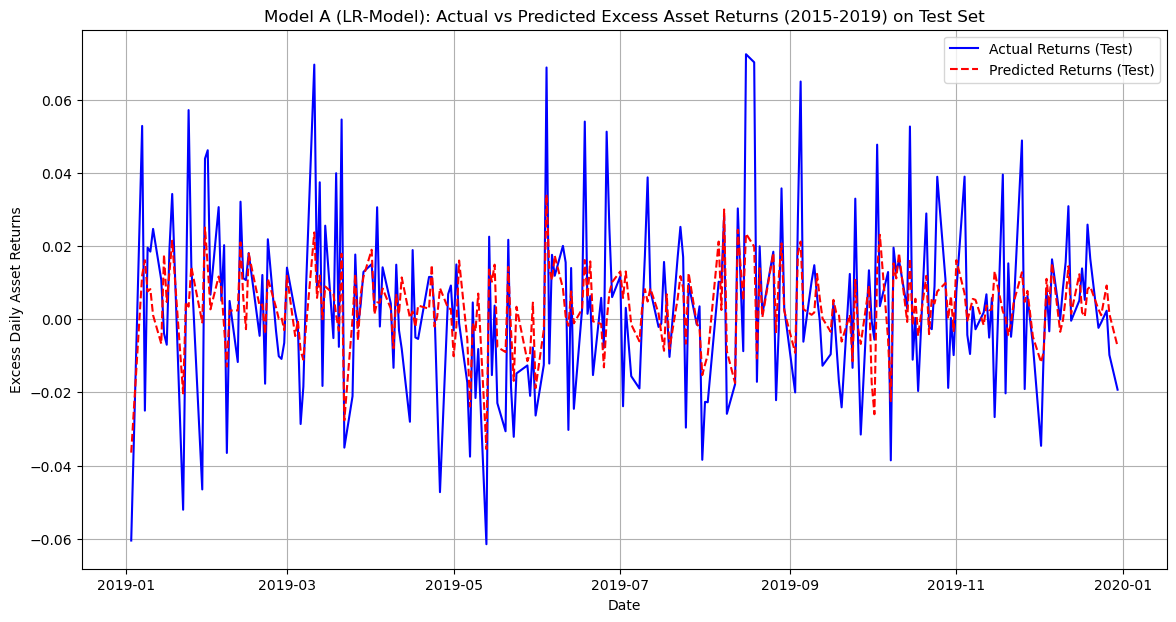

In [6]:

# Define X (independent variable) and y (dependent variable) for training
X_train = sm.add_constant(linear_train_df['Market_Returns'])  # Adding constant to model intercept
y_train = linear_train_df['Asset_Returns']  # Dependent variable: Asset returns

# Fit the OLS model
OLS_model = sm.OLS(y_train, X_train)
OLS_model_fit = OLS_model.fit()

# Output the beta estimate and summary
print(OLS_model_fit.summary())

# the the test set
X_test = sm.add_constant(linear_test_df['Market_Returns'])
y_test = linear_test_df['Asset_Returns']

# Forecast asset returns using the fitted OLS model
y_test_pred = OLS_model_fit.predict(X_test)

# Metrics for Test Set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Set - Root Mean Squared Error: {test_rmse}")
print(f"Test Set - Mean Absolute Error: {test_mae}")
print(f"Test Set - R^2 score: {test_r2}")

# Plot the predicted returns vs actual returns for the test set
plt.figure(figsize=(14, 7))
plt.plot(linear_test_df.index, y_test, label='Actual Returns (Test)', color='blue')
plt.plot(linear_test_df.index, y_test_pred, label='Predicted Returns (Test)', color='red', linestyle='--')
plt.title('Model A (LR-Model): Actual vs Predicted Excess Asset Returns (2015-2019) on Test Set')
plt.xlabel('Date')
plt.ylabel('Excess Daily Asset Returns')
plt.legend()
plt.grid(True)
plt.show()


In [7]:

# Create Traces
fig = go.Figure()

# Actual Returns (Test)
fig.add_trace(go.Scatter(x=linear_test_df.index, 
                         y=y_test, 
                         mode='lines', 
                         name='Actual Returns (Test)',
                         line=dict(color='blue')))

# Predicted Returns (Test)
fig.add_trace(go.Scatter(x=linear_test_df.index, 
                         y=y_test_pred, 
                         mode='lines', 
                         name='Predicted Returns (Test)',
                         line=dict(color='red', dash='dash')))

# Update layout
fig.update_layout(title='Test Set: Actual vs Predicted Returns',
                  xaxis_title='Date',
                  yaxis_title='Log Returns (Differenced)',
                  legend=dict(x=0, y=1.0),
                  hovermode='x unified')

# Show the figure
fig.show()
